<a href="https://colab.research.google.com/github/emanuel379/Analise-Multivariada-e-Aprendizado-Nao-Supervisionado-/blob/main/Exerc%C3%ADcio_9_Q6_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questão 9
Matheo Angelo Pereira Dantas

Emanuel Victor da Silva


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import geopandas as gpd

In [ ]:
df = pd.read_csv('amostra_banco_distrito.csv')
df

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito
0,106,F,32,Autônomo,6162,"-372,36",0,0,"1736,56",1,IPIRANGA
1,310,M,34,Privada,"3898,3","-45,74",0,0,"3567,22",1,ITAQUERA
2,431,F,28,Privada,5517,"-527,95",0,0,"2722,83",1,PENHA
3,590,F,28,Pública,"5546,2","907,92",0,0,"114,49",0,VILA PRUDENTE
4,971,F,32,Pública,5276,"1143,71",0,0,647,0,PENHA
...,...,...,...,...,...,...,...,...,...,...,...
495,98661,M,31,Privada,5841,"878,31",0,0,"1588,36",0,ARICANDUVA-FORMOSA-CARRAO
496,99693,F,33,Privada,5523,"907,84",0,0,"1888,18",0,ARICANDUVA-FORMOSA-CARRAO
497,99951,F,33,Privada,5862,"1269,47",0,0,92,0,ITAIM PAULISTA
498,99956,F,35,Privada,"6218,4","883,14",0,0,"1856,47",0,BUTANTA


In [ ]:
dummies = ['Sexo', 'Empresa']
df_dummies = pd.get_dummies(df, columns = dummies)
df_dummies

,Cliente,Idade,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,Distrito,Sexo_F,Sexo_M,Empresa_Autônomo,Empresa_Privada,Empresa_Pública
0,106,32,6162,"-372,36",0,0,"1736,56",1,IPIRANGA,1,0,1,0,0
1,310,34,"3898,3","-45,74",0,0,"3567,22",1,ITAQUERA,0,1,0,1,0
2,431,28,5517,"-527,95",0,0,"2722,83",1,PENHA,1,0,0,1,0
3,590,28,"5546,2","907,92",0,0,"114,49",0,VILA PRUDENTE,1,0,0,0,1
4,971,32,5276,"1143,71",0,0,647,0,PENHA,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,98661,31,5841,"878,31",0,0,"1588,36",0,ARICANDUVA-FORMOSA-CARRAO,0,1,0,1,0
496,99693,33,5523,"907,84",0,0,"1888,18",0,ARICANDUVA-FORMOSA-CARRAO,1,0,0,1,0
497,99951,33,5862,"1269,47",0,0,92,0,ITAIM PAULISTA,1,0,0,1,0
498,99956,35,"6218,4","883,14",0,0,"1856,47",0,BUTANTA,1,0,0,1,0


In [ ]:
agrupamento = df_dummies.groupby('Distrito')
media = agrupamento.mean()
media

<ipython-input-158-353c1c3eec81>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media = agrupamento.mean()


,Cliente,Idade,Inadimplente,Sexo_F,Sexo_M,Empresa_Autônomo,Empresa_Privada,Empresa_Pública
Distrito,,,,,,,,
ARICANDUVA-FORMOSA-CARRAO,73427.833333,31.416667,0.416667,0.583333,0.416667,0.250000,0.666667,0.083333
BUTANTA,61442.318182,31.590909,0.227273,0.454545,0.545455,0.090909,0.545455,0.363636
CAMPO LIMPO,41518.000000,32.130435,0.304348,0.391304,0.608696,0.130435,0.565217,0.304348
CAPELA DO SOCORRO,49592.368421,32.052632,0.421053,0.473684,0.526316,0.052632,0.736842,0.210526
CASA VERDE-CACHOEIRINHA,48460.882353,32.176471,0.294118,0.470588,0.529412,0.176471,0.705882,0.117647
CIDADE ADEMAR,45774.583333,33.333333,0.416667,0.416667,0.583333,0.083333,0.666667,0.250000
CIDADE TIRADENTES,54118.000000,31.571429,0.285714,0.285714,0.714286,0.000000,0.571429,0.428571
ERMELINO MATARAZZO,40033.111111,30.888889,0.444444,0.555556,0.444444,0.222222,0.777778,0.000000
FREGUESIA-BRASILANDIA,51818.750000,31.200000,0.200000,0.600000,0.400000,0.150000,0.400000,0.450000


**Agrupamento hierárquico**

In [ ]:
# Padronizando os dados
df_scaled = StandardScaler().fit_transform(media)
df_scaled = pd.DataFrame(df_scaled, columns = media.columns, index = media.index)

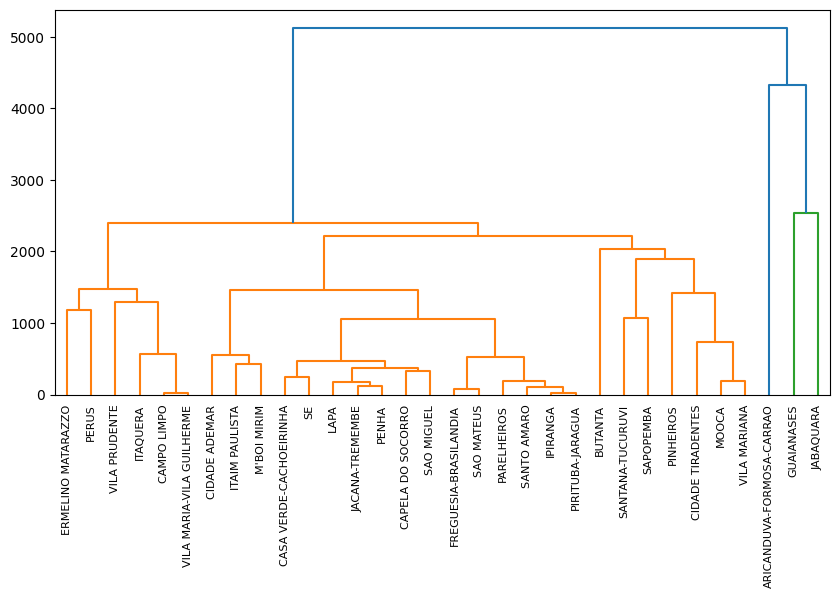

In [ ]:
linked = linkage(media, 'single')

plt.figure(figsize = (10, 5))
dendrogram(linked, orientation = 'top', labels = media.index, distance_sort = 'mannhatan', show_leaf_counts = True)
plt.xticks(rotation = 90)
plt.show()

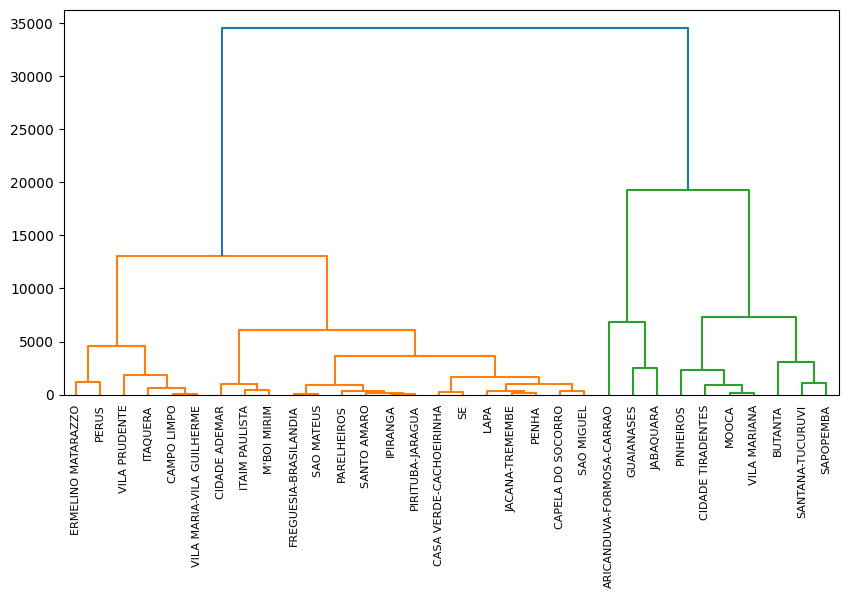

In [ ]:
linked = linkage(media, 'complete')

plt.figure(figsize = (10, 5))
dendrogram(linked, orientation = 'top', labels = media.index, distance_sort = 'mahalanobis', show_leaf_counts = True)
plt.xticks(rotation = 90)
plt.show()

**Agrupamento não-hierárquico**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


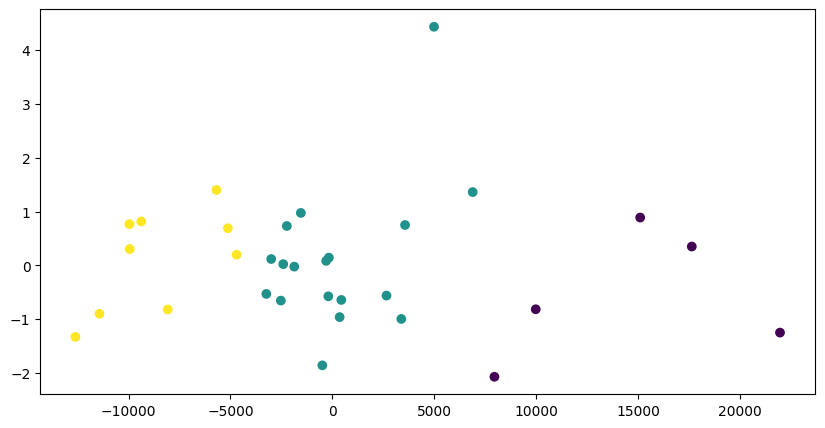

In [ ]:
kmedias = KMeans(n_clusters = 3)
kmedias.fit(media)
labels = kmedias.predict(media)

media['Kmeans'] = labels

pca = PCA(n_components = 3)
pca_resultado = pca.fit_transform(media)

plt.figure(figsize = (10, 5))
plt.scatter(pca_resultado[:, 0], pca_resultado[:, 1], c = labels)
plt.show()

**Visualização por distrito**

In [ ]:
global1 = gpd.read_file('/content/distritos-sp.geojson')
global2 = global1[['ds_subpref', 'geometry']]
global2

,ds_subpref,geometry
0,PIRITUBA-JARAGUA,"MULTIPOLYGON (((-46.71217 -23.45452, -46.71220..."
1,PIRITUBA-JARAGUA,"MULTIPOLYGON (((-46.76387 -23.47407, -46.76376..."
2,PIRITUBA-JARAGUA,"MULTIPOLYGON (((-46.77026 -23.45337, -46.77025..."
3,FREGUESIA-BRASILANDIA,"MULTIPOLYGON (((-46.71437 -23.46231, -46.71438..."
4,FREGUESIA-BRASILANDIA,"MULTIPOLYGON (((-46.68976 -23.50903, -46.68996..."
...,...,...
91,SAO MIGUEL,"MULTIPOLYGON (((-46.44027 -23.47986, -46.43999..."
92,ITAQUERA,"MULTIPOLYGON (((-46.51685 -23.55514, -46.51686..."
93,ITAQUERA,"MULTIPOLYGON (((-46.44461 -23.59272, -46.44470..."
94,ITAQUERA,"MULTIPOLYGON (((-46.42933 -23.53341, -46.42933..."


In [ ]:
distrito = list(media.index)
grupos = media['Kmeans']

agrupamento_distritos = {i: [] for i in range(3)}

for regiao, grupo in zip(distrito, grupos):
  agrupamento_distritos[grupo].append(regiao)

for grupo, regiao in agrupamento_distritos.items():
  print(f'Cluster {grupo} : {regiao}')

KeyError: ignored

In [ ]:
dif1 = set(distrito)
dif2 = set(global2['ds_subpref'].unique().tolist())

ambos = list(dif1.intersection(dif2))
apenas_banco = list(dif1.difference(dif2))
apenas_mapa = list(dif2.difference(dif1))

print("ambos:", ambos)
print("apenas banco:", apenas_banco)
print("apenas mapa:", apenas_mapa)

ds = pd.Series(global2['ds_subpref'].unique().tolist(), index=global2['ds_subpref'].unique().tolist()).to_dict()
ds_not_found = []

for ds in apenas_banco:
    sub_ds = ds.split('-')
    for s in sub_ds:
        if s in apenas_mapa:
            ds[s] = ds
        else:
            ds_not_found.append(s)

ds['VILA FORMOSA'] = 'ARICANDUVA-FORMOSA-CARRAO'
ds['FREGUESIA DO O'] = 'FREGUESIA-BRASILANDIA'

In [ ]:
global2['name']=global2['ds_subpref'].map(ds)
global2=global2[['name', 'geometry']]

In [ ]:
all_data = pd.merge(global2, grupos.reset_index(), how='left', left_on='name', right_on='Distrito')

all_data.loc[:, 'Kmeans'] = all_data.loc[:, 'Kmeans'].fillna(-1)

all_data.plot(column='Saldo_cc', figsize=(18, 8), cmap='winter')